# WeatherPy

In [89]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [90]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [91]:
url = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + weather_api_key + "&q="
units = "&units=imperial"

print("Beginning Data Retrieval")
print("------------------------------")

city_name = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
weather_date = []

for city in cities:
    try:
        response = requests.get(url + city + units).json()
        city_name.append(response['name'])
        city_id = response['id']
        city = response['name']
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        weather_date.append(response['dt'])
        print(f"Processing Record {city_id} | {city}")
    
    except:
        print("City not found. Skipping...")

Beginning Data Retrieval
------------------------------
Processing Record 3372707 | Ribeira Grande
Processing Record 3571913 | Marsh Harbour
Processing Record 5367788 | Lompoc
Processing Record 3652764 | Puerto Ayora
Processing Record 3833367 | Ushuaia
Processing Record 2630299 | Hofn
City not found. Skipping...
Processing Record 6201424 | Mataura
City not found. Skipping...
Processing Record 4047434 | Russell
Processing Record 3491161 | Bull Savanna
Processing Record 6089245 | Norman Wells
Processing Record 4021858 | Guerrero Negro
Processing Record 3831208 | Qaanaaq
Processing Record 3460087 | Jardim
Processing Record 1625929 | Sungai Penuh
Processing Record 3397941 | Itapagé
Processing Record 5880054 | Barrow
Processing Record 2110227 | Butaritari
Processing Record 4035715 | Avarua
Processing Record 2335953 | Jos
Processing Record 466699 | Yugo-Kamskiy
Processing Record 546105 | Nikolskoye
Processing Record 4032243 | Vaini
Processing Record 1487332 | Verkhnyaya Inta
Processing Recor

Processing Record 2014624 | Udachny
Processing Record 1799348 | Ningyang
Processing Record 5404476 | Ukiah
Processing Record 4671141 | Aransas Pass
Processing Record 487928 | Novikovo
Processing Record 1059507 | Marovoay
Processing Record 5563839 | Fortuna
Processing Record 3667478 | Tame
Processing Record 2640377 | Penzance
Processing Record 2016307 | Solnechnyy
Processing Record 1650434 | Bambanglipuro
Processing Record 5866583 | Saint Paul Harbor
Processing Record 780687 | Berlevåg
Processing Record 2071860 | Esperance
Processing Record 3945985 | Camaná
City not found. Skipping...
Processing Record 6096551 | Pangnirtung
Processing Record 1630789 | Pontianak
Processing Record 3445026 | Vila Velha
Processing Record 2126123 | Chokurdakh
Processing Record 3449747 | Santa Vitória do Palmar
Processing Record 2652885 | Cleethorpes
Processing Record 2259655 | Impfondo
Processing Record 2036892 | Hohhot
Processing Record 3423146 | Ilulissat
Processing Record 3440777 | Rocha
Processing Record

Processing Record 1805857 | Jieshi
City not found. Skipping...
Processing Record 3451138 | Rio Grande
Processing Record 1180729 | Dalbandin
Processing Record 946257 | Ulundi
Processing Record 1686004 | Venice of the Philippines
Processing Record 2501152 | Constantine
City not found. Skipping...
Processing Record 3428068 | San Vicente
Processing Record 3671519 | Puerto Carreño
Processing Record 2119283 | Zyryanka
Processing Record 175967 | Mporokoso
Processing Record 553766 | Kamenka
City not found. Skipping...
Processing Record 3393106 | Paragominas
Processing Record 1857260 | Mikuni
Processing Record 1786538 | Yining
Processing Record 1707233 | Larap
Processing Record 923058 | Kambove
Processing Record 2017658 | Preobrazheniye
Processing Record 556268 | Ostrovnoy
Processing Record 601551 | Akdepe
Processing Record 4002745 | La Cruz
Processing Record 3386213 | Touros
Processing Record 3468592 | Cabreúva
Processing Record 3171163 | Provincia di Pescara
Processing Record 2460954 | Araoua

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [92]:
weather_data_df = pd.DataFrame({
    "City":city_name,
    "Lat":latitude,
    "Lon":longitude,
    "Max Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speed,
    "Country":country,
    "Date":weather_date     
})

weather_data_df.count()

City          563
Lat           563
Lon           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [93]:
weather_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.52,-28.70,73.40,69,75,16.11,PT,1594660082
1,Marsh Harbour,26.54,-77.06,85.15,72,99,9.06,BS,1594659893
2,Lompoc,34.64,-120.46,59.00,82,90,4.70,US,1594660251
3,Puerto Ayora,-0.74,-90.35,75.20,69,75,18.34,EC,1594660077
4,Ushuaia,-54.80,-68.30,33.80,86,90,25.28,AR,1594659857


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [94]:
weather_data_df.describe()

,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,19.958117,10.435062,70.838028,67.761989,50.712256,7.792167,1.594660e+09
std,33.115116,90.074735,14.865993,20.630114,36.157903,4.948215,2.051310e+02
min,-54.800000,-175.200000,28.400000,3.000000,0.000000,0.180000,1.594660e+09
25%,-8.045000,-68.550000,59.740000,57.000000,17.500000,4.395000,1.594660e+09
50%,21.550000,14.700000,73.000000,72.000000,50.000000,6.760000,1.594660e+09
75%,48.910000,87.275000,81.940000,83.000000,87.500000,10.290000,1.594661e+09
max,78.220000,179.320000,109.170000,100.000000,100.000000,33.060000,1.594661e+09


In [95]:
# Make a new DataFrame to drop any cities with a humidity greather than 100
lower_humidity_df = weather_data_df.loc[weather_data_df["Humidity"] <= 100, :]

lower_humidity_df.to_csv("output_data/WeatherData.csv", index=False, header=True)

lower_humidity_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.52,-28.70,73.40,69,75,16.11,PT,1594660082
1,Marsh Harbour,26.54,-77.06,85.15,72,99,9.06,BS,1594659893
2,Lompoc,34.64,-120.46,59.00,82,90,4.70,US,1594660251
3,Puerto Ayora,-0.74,-90.35,75.20,69,75,18.34,EC,1594660077
4,Ushuaia,-54.80,-68.30,33.80,86,90,25.28,AR,1594659857


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

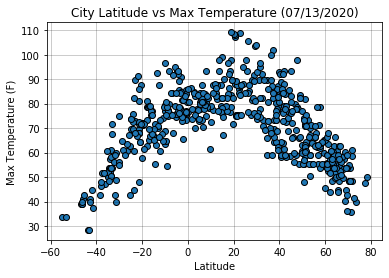

In [96]:
today_date = pd.to_datetime('today').strftime("%m/%d/%Y")

plt.scatter(lower_humidity_df["Lat"],lower_humidity_df["Max Temp"], edgecolor = 'black')
plt.grid(color="black", linewidth=1,alpha=0.20)
plt.title("City Latitude vs Max Temperature (" + today_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("output_data/LatitudeVSMaxTemperature.png")
plt.show()

#### The graph is showing the correlation between latitude and maximum tempature. The closer to the equator (0 Latitude), the hotter the temperatures. 

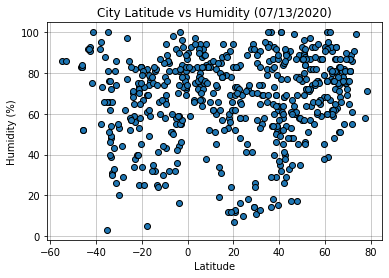

In [97]:
plt.scatter(lower_humidity_df["Lat"],lower_humidity_df["Humidity"], edgecolor = 'black')
plt.grid(color="black", linewidth=1,alpha=0.20)
plt.title("City Latitude vs Humidity (" + today_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("output_data/LatitudeVSHumidity.png")
plt.show()

#### The graph is showing the correlation between latitude and humidity. There does not appear to be a correlation between latitude and humidity.

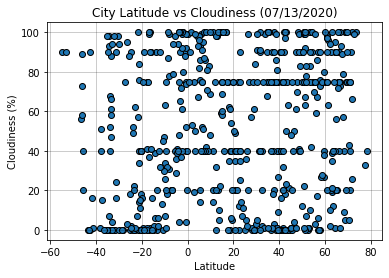

In [98]:
plt.scatter(lower_humidity_df["Lat"],lower_humidity_df["Cloudiness"], edgecolor = 'black')
plt.grid(color="black", linewidth=1,alpha=0.20)
plt.title("City Latitude vs Cloudiness (" + today_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("output_data/LatitudeVSCloudiness.png")
plt.show()

#### The graph is showing the correlation between latitude and cloudiness. There does not appear to be a correlation between latitude and cloudiness.

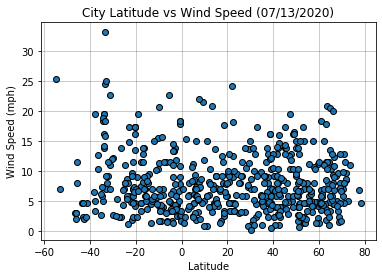

In [99]:
plt.scatter(lower_humidity_df["Lat"],lower_humidity_df["Wind Speed"], edgecolor = 'black')
plt.grid(color="black", linewidth=1,alpha=0.20)
plt.title("City Latitude vs Wind Speed (" + today_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("output_data/LatitudeVSWindSpeed.png")
plt.show()

#### The graph is showing the correlation between latitude and wind speed. It appears no matter what latitude the wind speeds are lower with a few outliers. 

## Linear Regression

In [100]:
# OPTIONAL: Create a function to create Linear Regression plots
def hemp_regression(x_values,y_values,y_axis_name,hemisphere):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.min(), y_values.min()),fontsize=15,color="red")
    plt.title(hemisphere + " - " + y_axis_name + " vs. Latitude Linear Regression")
    plt.xlabel("Latitude")
    plt.ylabel(y_axis_name)
    print(f"The r-squared is: {rvalue**2}")
    plt.savefig("output_data/Regression_"+ hemisphere + "_LatitudeVs" + y_axis_name + ".png")
    plt.show()

In [101]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = lower_humidity_df.loc[lower_humidity_df["Lat"] >= 0, :]
northern_hemisphere_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.52,-28.70,73.40,69,75,16.11,PT,1594660082
1,Marsh Harbour,26.54,-77.06,85.15,72,99,9.06,BS,1594659893
2,Lompoc,34.64,-120.46,59.00,82,90,4.70,US,1594660251
5,Hofn,64.25,-15.21,53.60,87,90,11.41,IS,1594660092
7,Russell,32.35,-85.20,82.40,74,40,4.52,US,1594659879


In [102]:
# Create Northern and Southern Hemisphere DataFrames
southern_hemisphere_df = lower_humidity_df.loc[lower_humidity_df["Lat"] < 0, :]
southern_hemisphere_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Puerto Ayora,-0.74,-90.35,75.20,69,75,18.34,EC,1594660077
4,Ushuaia,-54.80,-68.30,33.80,86,90,25.28,AR,1594659857
6,Mataura,-46.19,168.86,39.00,83,89,3.00,NZ,1594660078
12,Jardim,-21.48,-56.14,81.05,53,76,1.88,BR,1594660283
13,Sungai Penuh,-2.08,101.38,65.71,93,100,2.42,ID,1594660463


The r-squared is: 0.5213499274229687


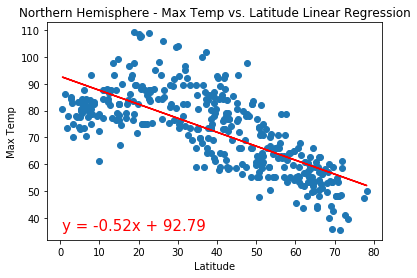

In [103]:
hemp_regression(northern_hemisphere_df["Lat"],northern_hemisphere_df["Max Temp"],"Max Temp","Northern Hemisphere")

The r-squared is: 0.6595823023834836


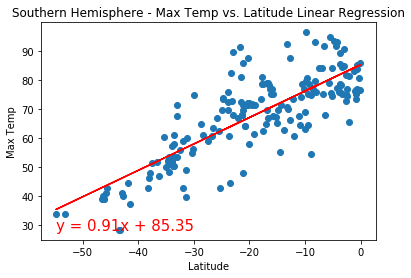

In [104]:
hemp_regression(southern_hemisphere_df["Lat"],southern_hemisphere_df["Max Temp"],"Max Temp","Southern Hemisphere")

#### In both hemispheres, there appears to be a direct correlation between latitude and temperature. As the latitude increases the temperature decreases and as the latitude decreases the temperature increases.


The r-squared is: 0.010081827968333363


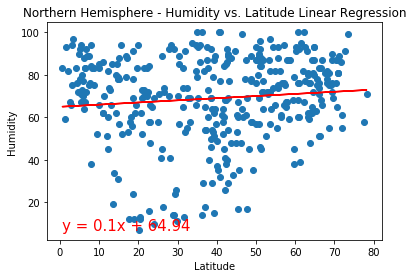

In [105]:
hemp_regression(northern_hemisphere_df["Lat"],northern_hemisphere_df["Humidity"],"Humidity","Northern Hemisphere")

The r-squared is: 5.639710521143807e-05


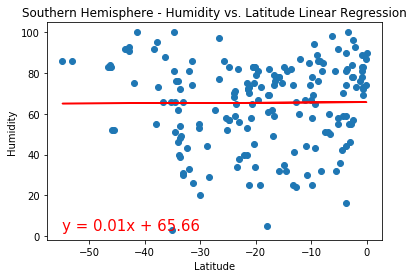

In [106]:
hemp_regression(southern_hemisphere_df["Lat"],southern_hemisphere_df["Humidity"],"Humidity","Southern Hemisphere")

#### There appears to be no correlation between latitude and humidity. The regression lines are pretty straight showing there is no way of determing humidity based on latitude and vice versa.

The r-squared is: 0.00029987732759901756


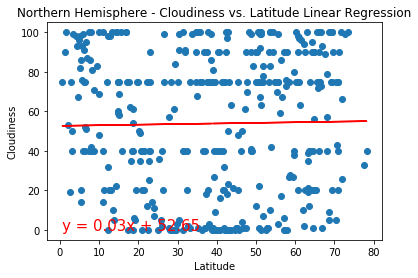

In [107]:
hemp_regression(northern_hemisphere_df["Lat"],northern_hemisphere_df["Cloudiness"],"Cloudiness","Northern Hemisphere")

The r-squared is: 0.028525124538842


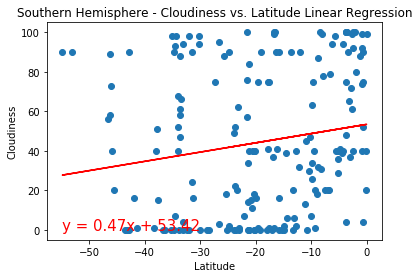

In [108]:
hemp_regression(southern_hemisphere_df["Lat"],southern_hemisphere_df["Cloudiness"],"Cloudiness","Southern Hemisphere")

#### In the northern hemisphere, the regression line is almost flat which shows there is not much of a correlation between latitude and cloudiness. In the southern hemisphere, the line has a slight upward trend which denotes that as latitude decreases the cloudiness increases. 

The r-squared is: 0.001774047270535346


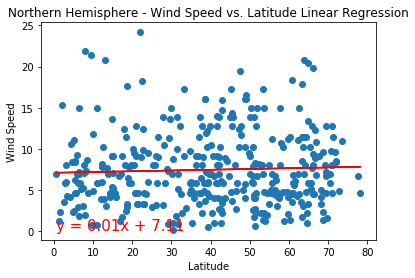

In [109]:
hemp_regression(northern_hemisphere_df["Lat"],northern_hemisphere_df["Wind Speed"],"Wind Speed","Northern Hemisphere")

The r-squared is: 0.0238766822068399


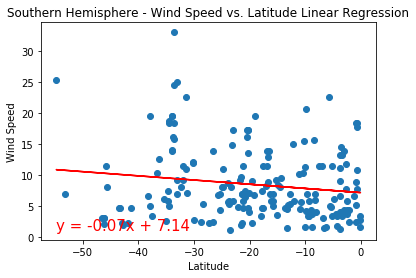

In [110]:
hemp_regression(southern_hemisphere_df["Lat"],southern_hemisphere_df["Wind Speed"],"Wind Speed","Southern Hemisphere")

#### In the northern hemisphere, the regression line is almost flat which shows there is not much of a correlation between latitude and wind speed. In the southern hemisphere, the line has a slight downward trend which denotes that as latitude increases the cloudiness decreases.

# Observable Trends

#### 1. There appears to be a correlation between latitude and max temperature. As the latitude gets closer to 0, the temperature is higher.

#### 2. There does not appear to be as good of a correlation between latitude and the other parameters (cloudiness, humidity and wind speed.

#### 3. When you look at the data between northern and southern hemisphere, there are slight correlations, such as in the southern hemisphere there is a slight downward trend between latitude and cloudiness which shows as latitude increases the cloudiness decreases. 